In [1]:
import pandas as pd 
import numpy as np 
from sklearn.linear_model import LinearRegression

In [3]:
Weight = np.array([2,4,5,3,6,5,7])
Price = np.array([35,60,20,50,50,55,60])

In [5]:
df = pd.DataFrame({'Weight': Weight, 'Price': Price})
df

,Weight,Price
0,2,35
1,4,60
2,5,20
3,3,50
4,6,50
5,5,55
6,7,60


In [7]:
x = df[['Weight']]
y = df['Price']

Text(0, 0.5, 'Price')

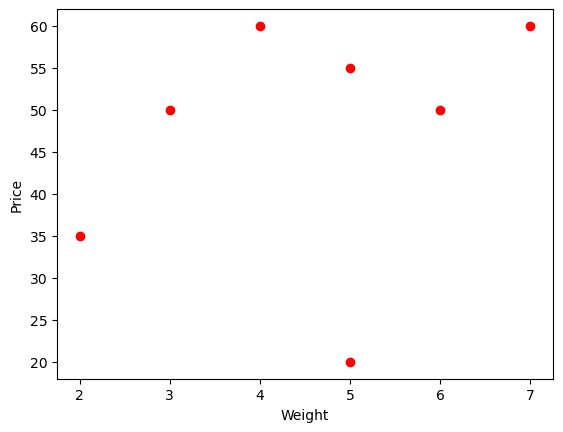

In [9]:
import matplotlib.pyplot as plt
plt.scatter(df.Weight, df.Price, marker='o',color='red')
plt.xlabel('Weight')
plt.ylabel('Price')

In [11]:
N = len(Weight) 
sum_x = np.sum(Weight) 
sum_y = np.sum(Price) 
sum_xy = np.sum(Weight * Price) 
sum_x2 = np.sum(Weight**2) 

slope_formula1 = (N * sum_xy - sum_x * sum_y) / (N * sum_x2 - sum_x**2)
intercept_formula1 = (sum_y - slope_formula1 * sum_x) / N
print(f"Slope (M): {slope_formula1}")
print(f"Intercept (C): {intercept_formula1}")

Slope (M): 2.620967741935484
Intercept (C): 35.16129032258065


In [13]:
def predict(weight, slope, intercept):
    return slope * weight + intercept
    
predicted_prices = predict(df.Weight, slope_formula1, intercept_formula1)

In [15]:
df['predicted_prices'] = predicted_prices
df

,Weight,Price,predicted_prices
0,2,35,40.403226
1,4,60,45.645161
2,5,20,48.266129
3,3,50,43.024194
4,6,50,50.887097
5,5,55,48.266129
6,7,60,53.508065


In [17]:
df['Residuals'] = df['Price'] - predicted_prices
df.head()

,Weight,Price,predicted_prices,Residuals
0,2,35,40.403226,-5.403226
1,4,60,45.645161,14.354839
2,5,20,48.266129,-28.266129
3,3,50,43.024194,6.975806
4,6,50,50.887097,-0.887097


Text(0, 0.5, 'Price')

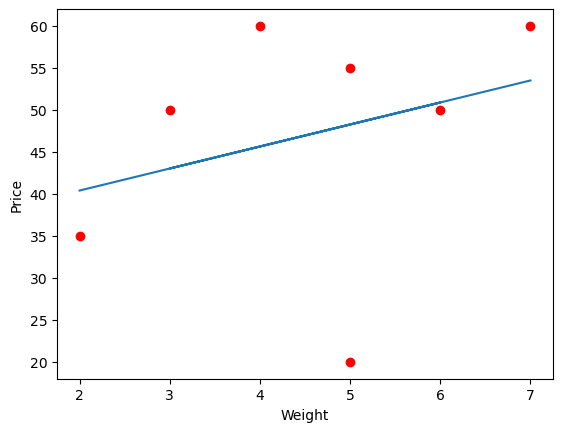

In [19]:
plt.scatter(df.Weight, df.Price, marker='o',color='red')
plt.plot(df.Weight, predicted_prices)
plt.xlabel('Weight')
plt.ylabel('Price')

In [21]:
mse = np.mean((df['Price'] - df['predicted_prices']) ** 2)
mae = np.mean(df['Price']-df['predicted_prices'])
mse, mae

(167.30990783410135, -3.045183153257572e-15)

In [23]:
df.to_excel('Assignment 4.xlsx', index=False)